# Mi Primer Proyecto en Python

Este notebook fue creado para explorar conceptos básicos de Python y analizar datos de ejemplo (En este caso las parroquias de la ciudad de Guayaquil).  
- **Objetivo:** Practicar las habilidades iniciales en programación.  
- **Contenido:** Incluye manipulación de datos, visualizaciones básicas y ejemplos de lógica.  
- **Herramientas utilizadas:** Google Colab, Visual Studio Code y GitHub.


## 1. Importación de Librerías
Aquí cargamos las librerías necesarias para el análisis.

In [ ]:
!pip install contextily
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import contextily
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 56.3 MB/s eta 0:00:00


## 2. Carga de Datos
Se realiza la carga del dataset desde un archivo local o URL.

In [ ]:
df_parroquias = gpd.read_file("LIMITE_PARROQUIAS_URBANAS.geojson")

## 3. Análisis Exploratorio de Datos (EDA)
Resumen estadístico, visualización de datos y preparación para el análisis.

In [ ]:
df_parroquias["Nam"]

,Nam
0,ROCA
1,ROCAFUERTE
2,OLMEDO
3,BOLIVAR
4,AYACUCHO
5,GARCÍA MORENO
6,SUCRE
7,NUEVE DE OCTUBRE
8,URDANETA
9,LETAMENDI


In [ ]:
display(df_parroquias.head())
print(df_parroquias.info())

,FID,OBJECTID_1,OBJECTID,Nam,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,geometry
0,1,1,1,ROCA,2767.658731,426844.629355,430520.285767,2780.051889,"POLYGON ((-79.88373 -2.18397, -79.88364 -2.183..."
1,2,2,2,ROCAFUERTE,3619.022006,711095.304001,717224.758789,3630.984876,"POLYGON ((-79.88408 -2.19102, -79.87896 -2.192..."
2,3,3,3,OLMEDO,3232.248000,631628.253204,637078.352417,3246.959974,"POLYGON ((-79.88048 -2.19749, -79.88098 -2.199..."
3,4,4,4,BOLIVAR,2642.222723,388558.054689,391911.814575,2656.146760,"POLYGON ((-79.88764 -2.19576, -79.88867 -2.203..."
4,5,5,5,AYACUCHO,3715.628912,807271.855233,814246.104980,3729.012356,"POLYGON ((-79.89001 -2.2033, -79.88864 -2.2036..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FID            16 non-null     int32   
 1   OBJECTID_1     16 non-null     int32   
 2   OBJECTID       16 non-null     int32   
 3   Nam            16 non-null     object  
 4   Shape_Leng     16 non-null     float64 
 5   Shape_Area     16 non-null     float64 
 6   Shape__Area    16 non-null     float64 
 7   Shape__Length  16 non-null     float64 
 8   geometry       16 non-null     geometry
dtypes: float64(4), geometry(1), int32(3), object(1)
memory usage: 1.1+ KB
None


In [ ]:
df_parroquias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_parroquias.to_crs(epsg=31992).crs

<Projected CRS: EPSG:31992>
Name: SIRGAS 1995 / UTM zone 17S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ecuador (mainland whole country including areas in northern hemisphere and east of 78°W), onshore and offshore. In remainder of South America, between 84°W and 78°W, southern hemisphere, onshore and offshore.
- bounds: (-84.0, -56.45, -75.21, 1.45)
Coordinate Operation:
- name: UTM zone 17S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para America del Sur 1995
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
df_parroquias["centroid"] = df_parroquias.centroid
df_parroquias.head()

<ipython-input-12-a27dcd927ac6>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_parroquias["centroid"] = df_parroquias.centroid


,FID,OBJECTID_1,OBJECTID,Nam,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,geometry,centroid
0,1,1,1,ROCA,2767.658731,426844.629355,430520.285767,2780.051889,"POLYGON ((-79.88373 -2.18397, -79.88364 -2.183...",POINT (-79.88566 -2.18698)
1,2,2,2,ROCAFUERTE,3619.022006,711095.304001,717224.758789,3630.984876,"POLYGON ((-79.88408 -2.19102, -79.87896 -2.192...",POINT (-79.88509 -2.19357)
2,3,3,3,OLMEDO,3232.248000,631628.253204,637078.352417,3246.959974,"POLYGON ((-79.88048 -2.19749, -79.88098 -2.199...",POINT (-79.88496 -2.20028)
3,4,4,4,BOLIVAR,2642.222723,388558.054689,391911.814575,2656.146760,"POLYGON ((-79.88764 -2.19576, -79.88867 -2.203...",POINT (-79.89016 -2.19944)
4,5,5,5,AYACUCHO,3715.628912,807271.855233,814246.104980,3729.012356,"POLYGON ((-79.89001 -2.2033, -79.88864 -2.2036...",POINT (-79.88913 -2.20683)


<Axes: >

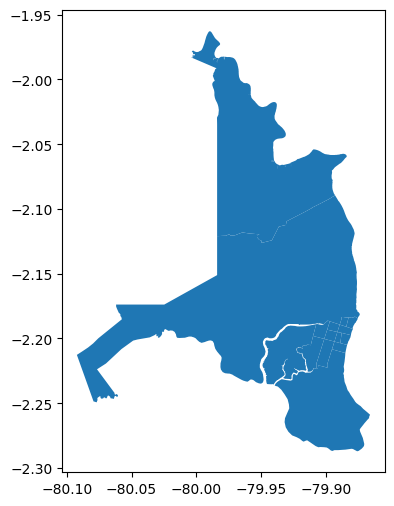

In [ ]:
df_parroquias.plot(figsize=(10,6))

<Axes: >

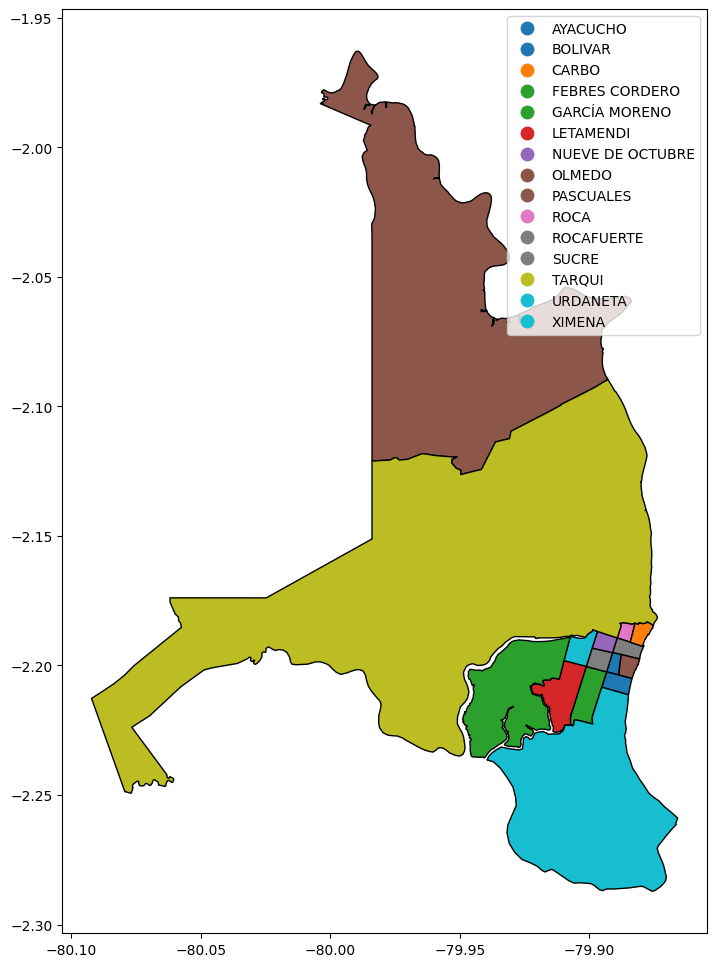

In [ ]:
df_parroquias.plot(figsize=(12,12), column= "Nam", edgecolor="black", legend=True)

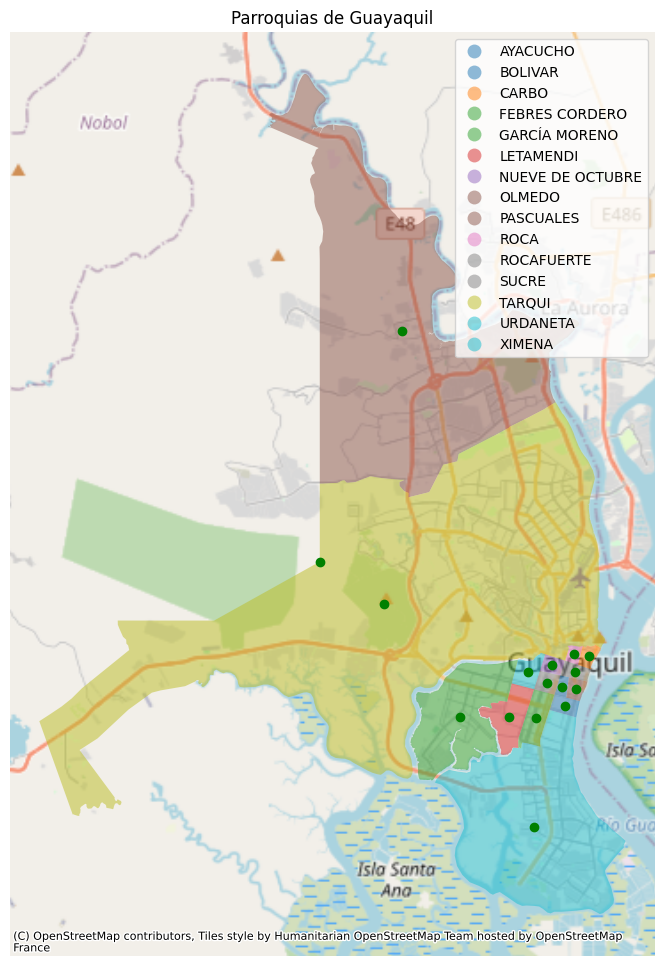

In [ ]:
# dibujando varios objetos y capas
# multipoligonos
ax= df_parroquias.plot(column="Nam", figsize=(12, 12), alpha=0.5, legend=True)
# centroides
df_parroquias["centroid"].plot(ax=ax, color="green")
# mapa de Guayaquil
contextily.add_basemap(ax, crs=df_parroquias.crs.to_string())
plt.title("Parroquias de Guayaquil")
plt.axis("off")
plt.show()

## 4. Conclusiones
Se documentan los hallazgos y aprendizajes.

### Conclusiones
1. Las parroquias de Guayaquil están representadas geográficamente, permitiendo una visión clara de su distribución.
2. Los centroides de las parroquias son útiles para análisis de densidad o planificación urbana.
3. La integración de mapas proporciona un contexto geográfico valioso.

### Aprendizajes
1. Geopandas permite trabajar eficientemente con datos espaciales y realizar visualizaciones personalizadas.
2. Los mapas multicapas mejoran la comprensión de datos al combinar diferentes elementos visuales.
3. La documentación y análisis con mapas contribuyen a una mejor toma de decisiones basada en datos.